In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [3]:

pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_was-22-ecmwf_197901-201711.nc')

pr




<xarray.Dataset>
Dimensions:    (time: 467, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2017-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 13 17:38:34 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
#pr.lon.values


 

-4207954

In [6]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


In [7]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [8]:
size = pr.pr.shape
print(size)


(431, 337, 429)


In [9]:
for time in range(size[0]):
        data = pr.pr[time,Ellipsis] * spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

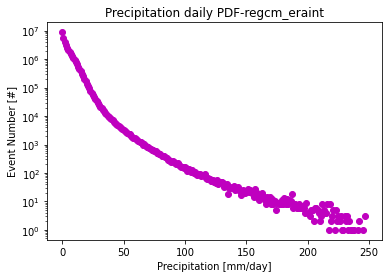

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'mo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-regcm_eraint')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_regcm_eraint.png")



plt.show( )